# Bank Note Authentication 

## Abstract:
    
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

## Data Set Information:
    
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an 
industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and
distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool
were used to extract features from images.

Source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Attribute Information:
    
variance - variance of Wavelet Transformed image (continuous)
skewness - skewness of Wavelet Transformed image (continuous)
curtosis - curtosis of Wavelet Transformed image (continuous)
entropy - entropy of image (continuous)
class - class (integer)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the banknote dataset in a dataframe. 
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [4]:
df.head(5)

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   var       1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
#Data Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [8]:
# No missing values
df.isna().sum()

var         0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

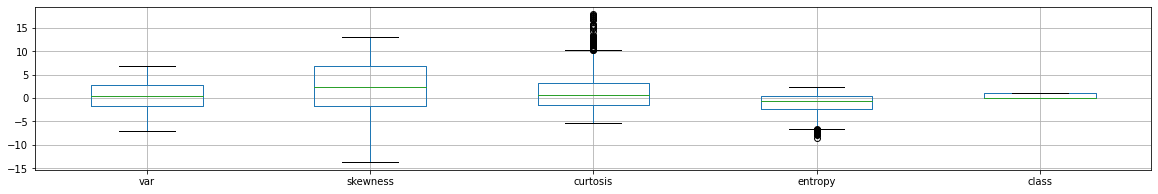

In [9]:
# Perhaps look at Curtosis distribution for the outliers
df.boxplot(figsize=(20,3))

In [10]:
df.skew()

var        -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

In [11]:
df.kurt()

var        -0.751581
skewness   -0.437212
curtosis    1.270476
entropy     0.497496
class      -1.953035
dtype: float64

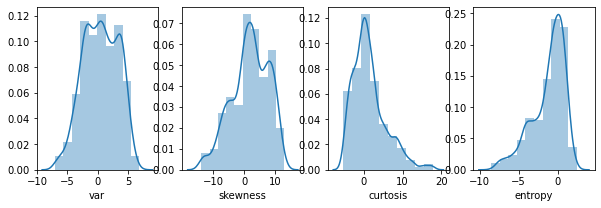

In [12]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')
# Distribution for all plots

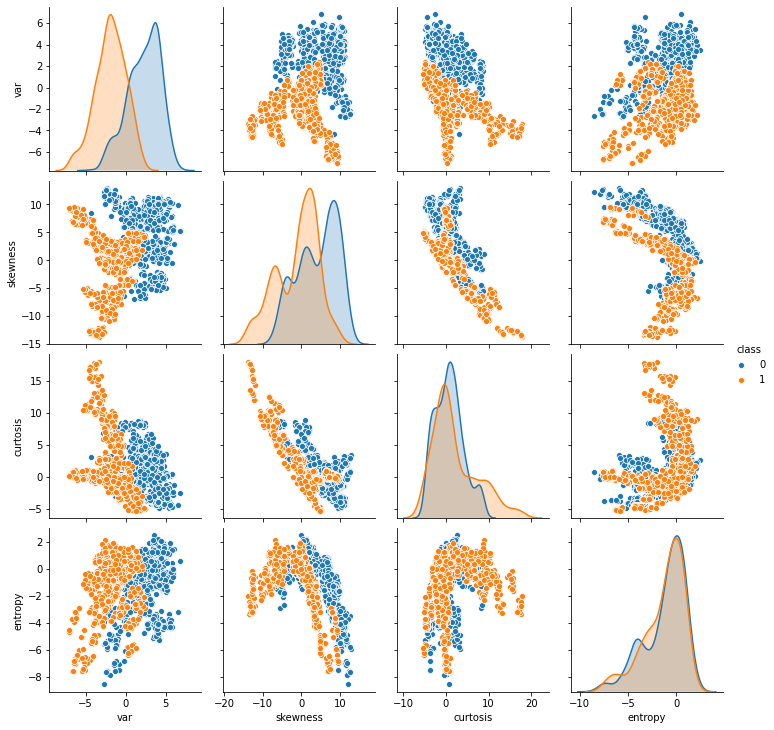

In [13]:
# now that we have a univariate distribution done, we can go ahead and determine the pairwise relationships in the dataset.
# we use the sns.pairplpot. Analyze the distrbutions.
# also, we add hue to see these distrbutions with the class col
sns.pairplot(df, hue="class")
# Seperation for features 

In [14]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
# Apply PCA to X variables and compare with the actual variables

In [15]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [16]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [ ]:
##########################################################################################

In [17]:
X_train_sd.shape

(1097, 4)

In [19]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00091241  0.26106526 -0.37965807  0.2855868 ]
 [ 0.26106526  1.00091241 -0.78600078 -0.52370267]
 [-0.37965807 -0.78600078  1.00091241  0.32384024]
 [ 0.2855868  -0.52370267  0.32384024  1.00091241]]


In [20]:
# print the covariance matrix
import pandas as pd
cov_matrix_df = pd.DataFrame(data=cov_matrix, columns=df.iloc[:,0:4].columns)
cov_matrix_df.index = df.iloc[:,0:4].columns
cov_matrix_df

,var,skewness,curtosis,entropy
var,1.000912,0.261065,-0.379658,0.285587
skewness,0.261065,1.000912,-0.786001,-0.523703
curtosis,-0.379658,-0.786001,1.000912,0.323840
entropy,0.285587,-0.523703,0.323840,1.000912


In [21]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)
# Ordered by Eigen Values
# Eigen Vector give weights to interpret back to features as reqd


Eigenvectors 
[[-0.24410388 -0.75674709  0.60295351  0.06476264]
 [-0.63914113  0.0457533  -0.11988157 -0.75830974]
 [ 0.61378454  0.15345344  0.50421613 -0.58778114]
 [ 0.3939295  -0.63379217 -0.60649943 -0.27438198]]

Eigenvalues 
[2.17821749 1.30130064 0.34425337 0.17987814]


In [22]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.40579687  86.90865691  95.50714586 100.        ]


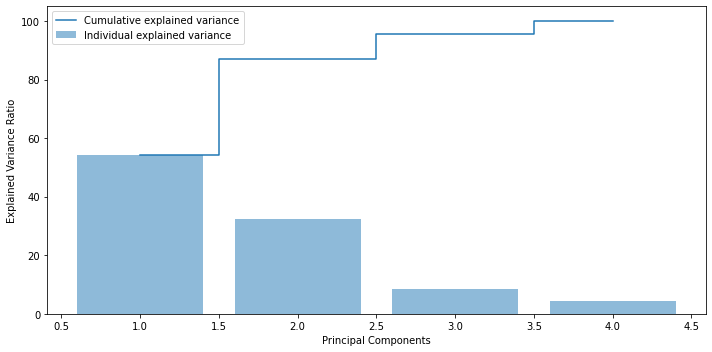

In [24]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
#Similar to Elbow Method to figure out # of Principal Components

In [25]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]
# Eigen Vectors - 4 diff features - Liinear comb. , Tells relationship between features and PC.

[(2.178217487681951,
  array([-0.24410388, -0.63914113,  0.61378454,  0.3939295 ])),
 (1.3013006373731921,
  array([-0.75674709,  0.0457533 ,  0.15345344, -0.63379217])),
 (0.3442533714828893,
  array([ 0.60295351, -0.11988157,  0.50421613, -0.60649943])),
 (0.179878138498464,
  array([ 0.06476264, -0.75830974, -0.58778114, -0.27438198]))]

In [26]:
df_ev = pd.DataFrame(e_vecs).T
df_ev.columns = df.iloc[:,0:4].columns
df_ev

# Principal Components Linear Equation
#PC1 = -0.244104 * var -0.639141 * skewness + 0.613785 * curtosis + 0.393929 * entropy

,var,skewness,curtosis,entropy
0,-0.244104,-0.639141,0.613785,0.393929
1,-0.756747,0.045753,0.153453,-0.633792
2,0.602954,-0.119882,0.504216,-0.606499
3,0.064763,-0.758310,-0.587781,-0.274382


In [27]:
eigen_pairs[0][1] # Eigen Vector 1

array([-0.24410388, -0.63914113,  0.61378454,  0.3939295 ])

In [28]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', w)
# Horizontally Stack Arrays - for Principal Component 1 & 2 Only

Matrix W:
 [[-0.24410388 -0.75674709]
 [-0.63914113  0.0457533 ]
 [ 0.61378454  0.15345344]
 [ 0.3939295  -0.63379217]]


In [29]:
print(X_train_sd.shape)
print(w.shape)

(1097, 4)
(4, 2)


In [30]:
X_sd_pca = X_train_sd.dot(w) # ( X dot K-EV)
X_test_sd_pca = X_test_sd.dot(w)
# Dot product to create new features, each feature weighted by Eigen Vectors to form Principal Components

In [31]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((1097, 4), (4, 2), (1097, 2), (275, 2))

### We will use Logistic regression, RandomForest and AdaBoost

In [32]:
# We lose out on accuracy so perhaps look to add Third Principal Component as well. Also, make sure no overfitting happening.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))


Before PCA score 0.9927272727272727
After PCA score 0.7709090909090909


In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))


Before PCA score 0.9890909090909091
After PCA score 0.8472727272727273


In [34]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))

Before PCA score 0.9963636363636363
After PCA score 0.8472727272727273


### In the given dataset we trained models with the orginal and dimensionally reduced datsets. The effects of PCA can be clearly appreciated on a fairly large datsaset. The learners are encouraged to try the above with various large datsets out there.

### Linear Discremant Analysis

In [35]:
#find a new feature space to linearly project the data in order to maximize classes separability
print(X_train_sd.shape)
print(X_test_sd.shape)

(1097, 4)
(275, 4)


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train_sd,y_train)  # Takes into acct y class before creating new features from original features

In [38]:
X_test_lda = lda.transform(X_test_sd)

In [39]:
X_test_lda.shape

(275, 1)

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_train_lda, y_train)
print ('After LDA score', clf.score(X_test_lda, y_test))

Before PCA score 0.9890909090909091
After LDA score 0.9854545454545455


In [ ]:
# lda takes into account classes before creating new features unlike PCA which focussed on the Original X only